In [1]:
import pandas as pd
# import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np

pend,hut=[],[]
df=pd.read_csv("DataTugas2.csv")
pend=df[' Pendapatan'].values
hut=df[' Hutang'].values

(0, 100)

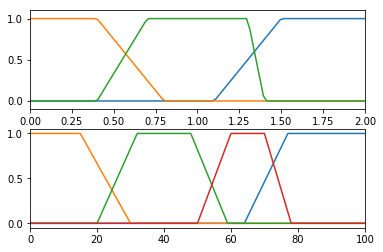

In [2]:
def hl(l,r,ek):
    if ek<=l:
        return 0
    elif ek>r:
        return 1
    return (ek-l)/(r-l)
def ll(l,r,ek):
    if ek<=l:
        return 1
    elif ek>r:
        return 0
    return 1-((ek-l)/(r-l))
def rg(l1,l2,r1,r2,ek):
    if ek<=l1 or ek>r2:
        return 0
    elif ek>l1 and ek<=l2:
        return (ek-l1)/(l2-l1)
    elif ek>l2 and ek<=r1:
        return 1
    elif ek>r1 and ek<=r2:
        return (r2-ek)/(r2-r1)
    return 0

phr=1.5
phl=1.1
plr=0.8
pll=0.4
pal1=0.4
pal2=0.7
par1=1.3
par2=1.4

hlr=30
hll=15

hal1=20
hal2=32
har1=48
har2=59

h2al1=50
h2al2=60
h2ar1=70
h2ar2=78

hhr=77
hhl=64

fig, axes = plt.subplots(nrows=2, sharex=False)
x = np.linspace(0, 2, 100)
axes[0].plot(x, [hl(phl,phr,xx) for xx in x])
axes[0].plot(x, [ll(pll,plr,xx) for xx in x])
axes[0].plot(x, [rg(pal1,pal2,par1,par2,xx) for xx in x])
axes[0].set_xlim(0, 2)
axes[0].set_ylim(-0.1, 1.1)

print()
x2 = np.linspace(0, 100, 500)
axes[1].plot(x2, [hl(hhl,hhr,xx) for xx in x2])
axes[1].plot(x2, [ll(hll,hlr,xx) for xx in x2])
axes[1].plot(x2, [rg(hal1,hal2,har1,har2,xx) for xx in x2])
axes[1].plot(x2, [rg(h2al1,h2al2,h2ar1,h2ar2,xx) for xx in x2])
axes[1].set_xlim(0, 100)


In [3]:
score=[]
acr=[]
i=0
while i<len(pend):
    score.append([
        {'label':'considered','score':min(hl(phl,phr,pend[i]),hl(hhl,hhr,hut[i]))},
        {'label':'rejected','score':min(hl(phl,phr,pend[i]),rg(hal1,hal2,har1,har2,hut[i]))},
        {'label':'rejected','score':min(hl(phl,phr,pend[i]),rg(h2al1,h2al2,h2ar1,h2ar2,hut[i]))},
        {'label':'rejected','score':min(hl(phl,phr,pend[i]),ll(hll,hlr,hut[i]))},
        
        {'label':'accepted','score':min(rg(pal1,pal2,par1,par2,pend[i]),hl(hhl,hhr,hut[i]))},
        {'label':'considered','score':min(rg(pal1,pal2,par1,par2,pend[i]),rg(hal1,hal2,har1,har2,hut[i]))},
        {'label':'accepted','score':min(rg(pal1,pal2,par1,par2,pend[i]),rg(h2al1,h2al2,h2ar1,h2ar2,hut[i]))},
        {'label':'rejected','score':min(rg(pal1,pal2,par1,par2,pend[i]),ll(hll,hlr,hut[i]))},
        
        {'label':'accepted','score':min(ll(pll,plr,pend[i]),hl(hhl,hhr,hut[i]))},
        {'label':'accepted','score':min(ll(pll,plr,pend[i]),rg(hal1,hal2,har1,har2,hut[i]))},
        {'label':'considered','score':min(ll(pll,plr,pend[i]),rg(h2al1,h2al2,h2ar1,h2ar2,hut[i]))},
        {'label':'considered','score':min(ll(pll,plr,pend[i]),ll(hll,hlr,hut[i]))},
    ])
    i+=1
# print(score)

In [4]:
i=0
while i<len(pend):
    cons=[]
    acc=[]
    rej=[]
    j=0
    while j<len(score[i]):
        if score[i][j]['label']=='considered':
            cons.append(score[i][j]['score'])
        elif score[i][j]['label']=='accepted':
            acc.append(score[i][j]['score'])
        elif score[i][j]['label']=='rejected':
            rej.append(score[i][j]['score'])
        j+=1
    acr.append({'considered':max(cons),'accepted':max(acc),'rejected':max(rej)})
    i+=1
# print(acr)

In [41]:
# import operator
def deff(r, c, a):
    return ((r * 30) + (c * 50) + (a * 80))/(r+c+a)
results=[]
result=[]
resrej=[]
score=[]
has=[]
i=0
df2=df
while i<len(acr):
    results.append({'index':i+1,'score':deff(acr[i]['rejected'],acr[i]['considered'],acr[i]['accepted'])})
    score.append(deff(acr[i]['rejected'],acr[i]['considered'],acr[i]['accepted']))
    i+=1
se = pd.Series(score)
df2['score'] = se.values
    
# for foo in sorted(results, key=operator.itemgetter("score"),reverse=True):
#     result.append(foo)
# i=0
# while i<len(result):
#     if(i>=20):
#         resrej.append(result[i]['index']-1)
#     i+=1


df2=df2.sort_values(by=['score'], ascending=False)

i=0
for index, row in df2.iterrows():
    if i<20:
        has.append(index+1)
    else:
        resrej.append(i)
    i+=1

print(has)
print(resrej)
print(df2)
# se = pd.Series(score)

[36, 9, 44, 74, 92, 24, 61, 47, 21, 15, 62, 77, 22, 66, 6, 3, 41, 23, 34, 49]
[20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
    No   Pendapatan   Hutang      score
35  36        0.946   98.000  80.000000
8    9        0.806   69.192  80.000000
43  44        0.902   68.021  80.000000
73  74        0.600   80.864  80.000000
91  92        0.817   62.427  80.000000
23  24        0.819   60.764  80.000000
60  61        0.880   79.878  80.000000
46  47        0.780   78.054  80.000000
20  21        0.155   29.496  78.778083
14  15        0.428   38.739  77.263844
61  62        1.159   87.871  76.143791
76  77        1.217   82.991  73.210832
21  22        0.828   56.747  73.013737
65  66        0.666   60.245  71.773533
5

    No   Pendapatan   Hutang      score
35  36        0.946   98.000  80.000000
8    9        0.806   69.192  80.000000
43  44        0.902   68.021  80.000000
73  74        0.600   80.864  80.000000
91  92        0.817   62.427  80.000000
23  24        0.819   60.764  80.000000
60  61        0.880   79.878  80.000000
46  47        0.780   78.054  80.000000
20  21        0.155   29.496  78.778083
14  15        0.428   38.739  77.263844
61  62        1.159   87.871  76.143791
76  77        1.217   82.991  73.210832
21  22        0.828   56.747  73.013737
65  66        0.666   60.245  71.773533
5    6        0.664   63.226  71.639344
2    3        1.273   80.701  70.942408
40  41        1.159   68.120  70.888031
22  23        0.112   26.202  70.135492
33  34        0.515   41.771  69.505703
48  49        0.516   43.660  69.422492


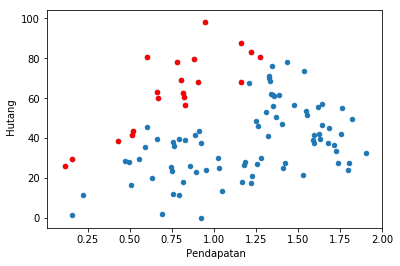

In [42]:
df2=df2.drop(df2.index[resrej])
print(df2)
ax1 = df.plot.scatter(x=' Pendapatan',y=' Hutang')
df2.plot.scatter(x=' Pendapatan',y=' Hutang',ax=ax1,color='#ff0000')

In [43]:
re=[]
i=0
for index, row in df2.iterrows():
    if i<20:
        re.append(index+1)
    i+=1
sil = pd.DataFrame(re)
sil.to_csv("TebakanTugas2.csv", encoding='utf-8', index=False,header=False)